# Practical 4

## Aim : Applying and Demonstrating PCA on Gene Dataset

In [1]:
#importing the libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from bioinfokit.analys import get_data
import numpy as np
import pandas as pd

In [2]:
# load dataset as pandas dataframe
df = get_data('gexp').data
df.head()

,A,B,C,D,E,F
0,4.50570,3.260360,-1.249400,8.898070,8.059550,-0.842803
1,3.50856,1.660790,-1.856680,-2.573360,-1.373700,1.196000
2,4.44701,3.411940,-1.040870,10.271195,10.517256,0.272272
3,2.16003,3.146520,0.982809,9.024300,6.058320,-2.967420
4,2.35701,0.452589,-1.910680,12.984239,10.019605,-2.939020


In [3]:
sc = StandardScaler()  #Standardization
df_st = sc.fit_transform(df.to_numpy()) 
df_st = pd.DataFrame(df_st, columns=df.columns)

In [4]:
df_st

,A,B,C,D,E,F
0,0.619654,0.448280,-0.240867,2.457058,2.304732,-0.331489
1,0.342286,-0.041499,-0.428652,-1.214732,-0.877151,0.474930
2,0.603329,0.494693,-0.176385,2.896569,3.133729,0.109563
3,-0.032825,0.413423,0.449383,2.497462,1.629707,-1.171850
4,0.021968,-0.411444,-0.445350,3.764964,2.965869,-1.160617
...,...,...,...,...,...,...
657,0.748838,-0.417202,-1.258111,-0.343870,-0.297936,0.076144
658,-1.172559,-0.376401,0.917559,-0.714077,-0.462364,0.343711
659,0.543549,-2.013050,-2.622721,-0.631173,-0.393266,0.321256
660,-0.058844,-1.643005,-1.579553,0.274049,0.292370,-0.175764


In [5]:
pca_out = PCA().fit(df_st)  #performing PCA
# get the component variance i.e. Proportion of Variance (from PC1 to PC6)
pca_out.explained_variance_ratio_

array([0.2978742 , 0.27481252, 0.23181442, 0.19291638, 0.00144353,
       0.00113895])

In [6]:
# Cumulative proportion of variance (from PC1 to PC6) 
np.cumsum(pca_out.explained_variance_ratio_)

array([0.2978742 , 0.57268672, 0.80450114, 0.99741752, 0.99886105,
       1.        ])

In [7]:
loadings = pca_out.components_ # To generate loadings of PC components
num_pc = pca_out.n_features_ # To find number of Principal Components
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values
# The set_index() method allows one or more column values become the row index.
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6
variable,,,,,,
A,-0.510898,0.452234,0.227356,-0.323464,0.614881,0.008372
B,-0.085908,0.401197,0.708556,0.132788,-0.558448,-0.010616
C,0.477477,-0.100994,0.462437,0.487951,0.556605,0.007893
D,0.370318,0.611485,-0.308295,0.054973,-0.007642,0.625159
E,0.568491,0.300118,-0.011775,-0.484115,0.009382,-0.593425
F,0.208090,-0.400426,0.370440,-0.634234,-0.010111,0.506732


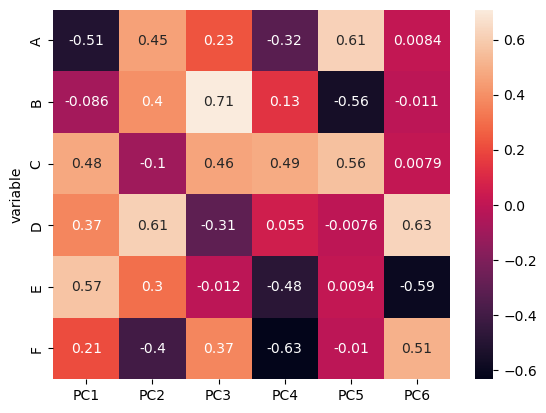

In [8]:
import seaborn as sns  # correlation matrix
import matplotlib.pyplot as plt
ax = sns.heatmap(loadings_df, annot=True)
plt.show()

In [9]:
pca_out.explained_variance_

array([1.78994905, 1.65136965, 1.39299071, 1.15924943, 0.0086743 ,
       0.00684401])

In [10]:
# To find share of each principal component in Total Variation
pca_out.explained_variance_ratio_

array([0.2978742 , 0.27481252, 0.23181442, 0.19291638, 0.00144353,
       0.00113895])

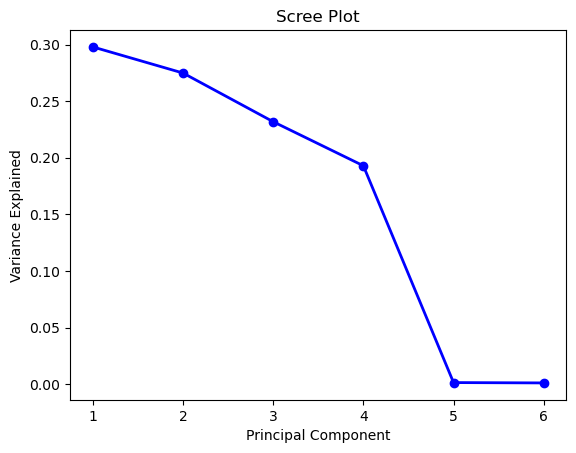

In [11]:
import matplotlib.pyplot as plt
import numpy as np
PC_values = np.arange(pca_out.n_components_) + 1
plt.plot(PC_values, pca_out.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [12]:
# get PC scores
pca_scores = PCA().fit_transform(df_st)
pca_scores

array([[ 1.68103382e+00,  2.81128580e+00, -5.60305386e-01,
        -1.02888221e+00,  2.80272767e-03, -1.08271325e-03],
       [-1.22564112e+00, -1.01477796e+00,  4.10949014e-01,
        -2.68741369e-01, -8.69804321e-03,  1.70794709e-03],
       [ 2.44199061e+00,  3.15695425e+00, -4.83189443e-01,
        -1.64287243e+00,  2.69592771e-03,  5.10858414e-03],
       ...,
       [-1.74750231e+00, -9.29558375e-01, -2.19739756e+00,
        -1.77095057e+00, -3.53376271e-03,  6.80098107e-03],
       [-3.51868836e-01, -2.00551729e-01, -2.06102374e+00,
        -9.84882176e-01,  4.58917333e-03, -8.67589623e-02],
       [ 4.99735383e-01, -4.08846186e-01, -6.39934975e-01,
        -2.35486111e-01, -3.70850857e-03,  3.78146628e-03]])

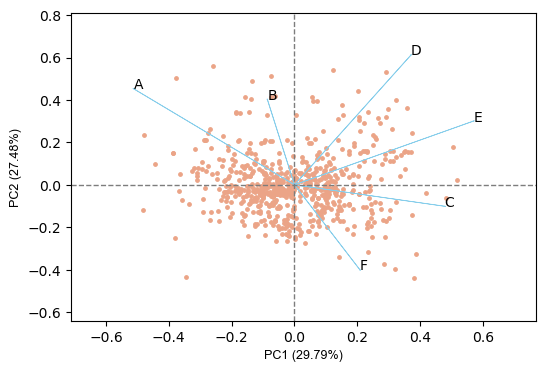

In [13]:
# get 2D biplot
from bioinfokit.visuz import cluster
cluster.biplot(cscore=pca_scores, show=True, loadings=loadings, labels=df.columns.values, 
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2))

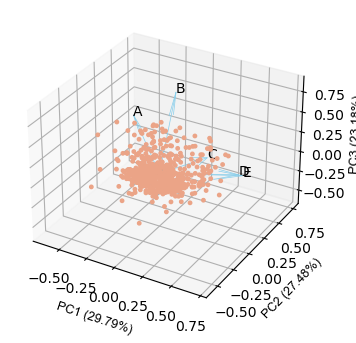

In [14]:
# get 3D biplot
from bioinfokit.visuz import cluster
cluster.biplot(cscore=pca_scores, show=True, loadings=loadings, labels=df.columns.values, 
               var1=round(pca_out.explained_variance_ratio_[0]*100, 2), 
               var2=round(pca_out.explained_variance_ratio_[1]*100, 2),
               var3=round(pca_out.explained_variance_ratio_[2]*100 ,2))